In [2]:
from gensim.models import Word2Vec

import nltk
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

from utils import preprocess

from gensim import corpora, matutils, models, similarities
from gensim.similarities.docsim import MatrixSimilarity

In [3]:
os.getcwd()
repo = '/home/yiyi/Documents/masterthesis/CPD'
data_dir = os.path.join(repo, 'data')
file ='cleand_query_output_csv/019b8823-aa09-4d8f-8b8d-26433d76dff3'

In [4]:
data = preprocess.get_data_list(os.path.join(data_dir, file))

Elapsed time: 13.6199 seconds


In [5]:
len(data), data[:1]

(56914, [['worth', 'money']])

In [6]:
# https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [7]:
model = Word2Vec(data, size=200, min_count=1)  # skipgram=1

In [8]:
def sent_vectorizer(sent, model):
    sent_vec = []
    numw = 0
    for w in sent:
        try:
            if numw==0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw += 1
        except:
            pass
    return np.asarray(sent_vec) / numw

In [9]:
X = []
for sentence in data:
    X.append(sent_vectorizer(sentence, model))

/home/yiyi/anaconda3/envs/cpd/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/home/yiyi/anaconda3/envs/cpd/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [10]:
np.asarray(X).shape

(56914, 200)

In [11]:
len(model.wv.vocab)

13257

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'WCSS')

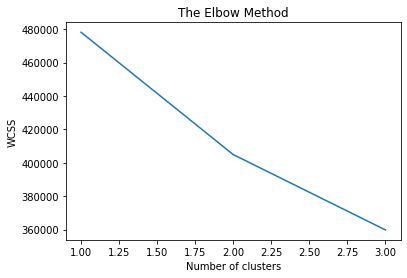

In [14]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
wcss = []
for i in range(1,4):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(X )
    wcss.append(kmeans.inertia_)
plt.plot(range(1,4), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [15]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [16]:
labels = kmeans.fit_predict(X)

In [17]:
len(labels), len(X)

(56914, 56914)

In [18]:
centroids = kmeans.cluster_centers_

In [19]:
kmeans.score(X)

-328164.6281861208

In [20]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.16921961

In [22]:
for index, sentence in enumerate(data):
    if labels[index]==0:
        print(sentence )

['staff', 'friendly']
['staff', 'excellent', 'helpful']
['staff', 'helpful', 'pleasant']
['hotel', 'staff', 'real', 'nice']
['try', 'help', 'direction', 'place', 'go', 'restaurant', 'service', 'absolutely', 'horrible']
['service', 'pool', 'beach', 'amazing']
['easy', 'check', 'nice', 'staff', 'clean', 'room', 'great', 'location']
['stay', 'employee', 'angry', 'service', 'awful']
['staff', 'wonderful']
['food', 'drink', 'superb', 'treated', 'exceptional']
['food', 'ok', 'overpriced']
['staff', 'rude']
['service', 'pool', 'beach', 'fantastic']
['nice', 'pool', 'area', 'beach', 'staff', 'acomodating', 'setting', 'chair', 'towel']
['front', 'desk', 'always', 'pleasant', 'acomodating']
['good', 'side', 'ground', 'pool', 'beach', 'nice', 'staff', 'friendly']
['however', 'worked', 'great']
['hotel', 'clean', 'kept', 'nice', 'staff', 'great']
['mark', 'front', 'desk', 'attendant', 'delightful']
['pool', 'private', 'bach', 'course', 'barefoot', 'billy', 'crew', 'sure', 'made', 'trip', 'relaxing